<a href="https://colab.research.google.com/github/leeCodingStudio/Python_machine_learning/blob/master/14_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98%EB%A1%9C_%EA%B5%AC%ED%98%84%ED%95%9C_%EB%85%BC%EB%A6%AC_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 단항 논리 회귀 실습
* 논리 회귀(Logistic Regression)
* 분류를 할 때 사용하며 선형 회귀 공식으로부터 나왔기 때문에 논리 회귀라는 이름이 붙여짐

![](https://i.imgur.com/nE29yVL.png)
> 직선 하나(선형 회귀)를 사용해서 예측한다면 제대로 예측할 수 없음

![](https://i.imgur.com/guvMfkf.png)
> Sigmoid 함수(Logistic 함수)를 사용하여 정확도를 높임

### Sigmoid 함수
- 예측값을 0에서 1사이 값이 되도록 만듬
* 0에서 1사이의 연속된 값을 출력으로 하기 때문에 보통 0.5를 기준으로 구분

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(10)

In [4]:
x_train = torch.FloatTensor([[0], [1], [3], [5], [9], [11], [15], [20]])
y_train = torch.FloatTensor([[0], [0], [0], [0], [0], [1], [1], [1]])

print(x_train.shape)
print(y_train.shape)

torch.Size([8, 1])
torch.Size([8, 1])


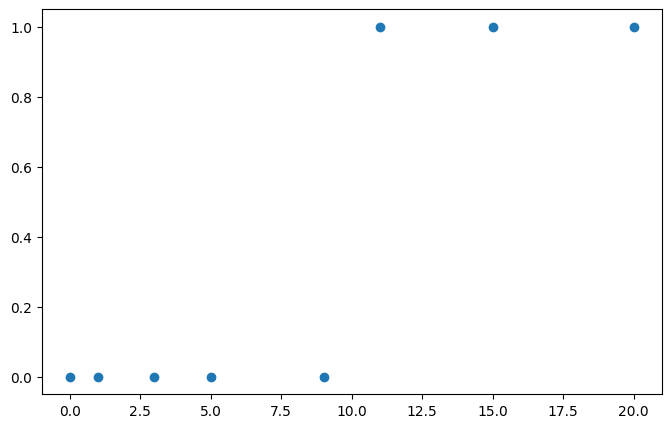

In [5]:
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train)

![](https://i.imgur.com/6NsfKMa.png)

In [7]:
model = nn.Sequential(
    nn.Linear(1, 1),
    nn.Sigmoid()
)

print(model)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)


In [8]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0838]], requires_grad=True), Parameter containing:
tensor([-0.0343], requires_grad=True)]


### 비용 함수
* 논리 회귀에서는 nn.BCELoss() 함수를 사용하여 Loss를 계산
* Binary Cross Entropy

<img src="https://i.imgur.com/tvCuEmh.png" width="600px">

In [9]:
y_pred = model(x_train)
y_pred

tensor([[0.4914],
        [0.4705],
        [0.4290],
        [0.3885],
        [0.3124],
        [0.2776],
        [0.2156],
        [0.1530]], grad_fn=<SigmoidBackward0>)

In [10]:
loss = nn.BCELoss()(y_pred, y_train)
loss

tensor(0.9290, grad_fn=<BinaryCrossEntropyBackward0>)

In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [12]:
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.BCELoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 0.929007
Epoch 100/100 Loss: 0.568484
Epoch 200/200 Loss: 0.519625
Epoch 300/300 Loss: 0.479047
Epoch 400/400 Loss: 0.445106
Epoch 500/500 Loss: 0.416481
Epoch 600/600 Loss: 0.392129
Epoch 700/700 Loss: 0.371230
Epoch 800/800 Loss: 0.353142
Epoch 900/900 Loss: 0.337362
Epoch 1000/1000 Loss: 0.323490


In [13]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.2162]], requires_grad=True), Parameter containing:
tensor([-1.7147], requires_grad=True)]


In [14]:
x_test = torch.FloatTensor([[2.5], [15.5]])
y_pred = model(x_test)
print(y_pred)

tensor([[0.2361],
        [0.8371]], grad_fn=<SigmoidBackward0>)


In [16]:
# 임계치 설정하기
# 0.5보다 크거나 같으면 1
# 0.5보다 작으면 0
y_bool = (y_pred >= 0.5).float()
print(y_bool)

tensor([[0.],
        [1.]])


# 2. 다항 논리 회귀 실습

In [25]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]

y_train = [0, 0, 0, 1, 1, 1, 2, 2]

x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [26]:
model = nn.Sequential(
    nn.Linear(4, 3)
)

print(model)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
)


In [27]:
y_pred = model(x_train)
print(y_pred)

tensor([[ 0.6272,  0.9446,  1.0174],
        [ 0.8912,  2.4454,  0.6555],
        [ 0.6075,  3.2021,  0.7560],
        [ 1.0409,  4.6684,  0.7930],
        [ 1.2494,  3.1110,  2.0120],
        [ 0.1258,  3.4367, -0.1276],
        [ 1.0237,  3.7302,  1.3633],
        [ 1.1369,  4.2804,  1.5123]], grad_fn=<AddmmBackward0>)


In [28]:
# 다항 논리 회귀에서는 BCELoss() 대신 CrossEntropyLoss()를 사용
# 소프트맥스 함수가 포함
loss = nn.CrossEntropyLoss()(y_pred, y_train)
print(loss)

tensor(1.4824, grad_fn=<NllLossBackward0>)


In [29]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [30]:
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.CrossEntropyLoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 1.482371
Epoch 100/100 Loss: 0.660156
Epoch 200/200 Loss: 0.574858
Epoch 300/300 Loss: 0.519700
Epoch 400/400 Loss: 0.474909
Epoch 500/500 Loss: 0.435243
Epoch 600/600 Loss: 0.398384
Epoch 700/700 Loss: 0.362854
Epoch 800/800 Loss: 0.327482
Epoch 900/900 Loss: 0.291415
Epoch 1000/1000 Loss: 0.256054


In [31]:
x_test = torch.FloatTensor([[1, 2, 5, 6]])
y_pred = model(x_test)
print(y_pred)

tensor([[-3.9068,  4.2237,  3.1180]], grad_fn=<AddmmBackward0>)


In [34]:
# 예측값과 확률 구하기
y_prob = nn.Softmax(1)(y_pred)
y_prob

tensor([[2.2115e-04, 7.5116e-01, 2.4862e-01]], grad_fn=<SoftmaxBackward0>)

In [35]:
print(f'0일 확률: {y_prob[0][0]:.2f}')
print(f'1일 확률: {y_prob[0][1]:.2f}')
print(f'2일 확률: {y_prob[0][2]:.2f}')

0일 확률: 0.00
1일 확률: 0.75
2일 확률: 0.25


In [36]:
torch.argmax(y_prob, axis=1)

tensor([1])